In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
poi=pd.read_csv(r"C:\Users\nenba\Downloads\poi_sbu.csv")

In [3]:
poi.head()

,ro_place_id,parent_ro_place_id,location_name,ro_brand_ids,brands,top_category,sub_category,lat,long,street_address,...,phone_number,open_hours,category_tags,opened_on,closed_on,tracking_opened_since,tracking_closed_since,poi_source,timestamp,ds_name
0,ro:b0fc631c-8e32-49f7-9147-56c80803301a,NaN,Caltex Jalan Buroh,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.303656,103.748093,210 Jalan Buroh,...,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",NaN,NaN,NaN,NaN,Sg Petrol Stations,7_2020,fuel_station
1,ro:4d56441d-5f01-4580-b2c7-8d7d3f1f8669,NaN,Caltex Lorong Chuan,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.350476,103.861603,277 Lorong Chuan Road,...,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",NaN,NaN,NaN,NaN,Sg Petrol Stations,7_2020,fuel_station
2,ro:e61e103d-5a80-4ae1-9607-63bf08f4bc2e,NaN,Caltex Serangoon Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.328144,103.868454,559 Upper Serangoon Road,...,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",NaN,NaN,NaN,NaN,Sg Petrol Stations,7_2020,fuel_station
3,ro:0fbeb730-418f-4da2-8906-be680ed12418,NaN,Caltex Frankel Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.318662,103.914444,71 Frankel Avenue,...,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",NaN,NaN,NaN,NaN,Sg Petrol Stations,7_2020,fuel_station
4,ro:4e02b510-e895-4615-b3a5-c90e15794baa,NaN,Caltex Tampines,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.349045,103.928528,1 Tampines Avenue 8,...,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",NaN,NaN,NaN,NaN,Sg Petrol Stations,7_2020,fuel_station


In [4]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ro_place_id            6260 non-null   object 
 1   parent_ro_place_id     0 non-null      float64
 2   location_name          6260 non-null   object 
 3   ro_brand_ids           6260 non-null   object 
 4   brands                 6260 non-null   object 
 5   top_category           6260 non-null   object 
 6   sub_category           6260 non-null   object 
 7   lat                    6260 non-null   float64
 8   long                   6260 non-null   float64
 9   street_address         6259 non-null   object 
 10  city                   6260 non-null   object 
 11  region                 6254 non-null   object 
 12  postal_code            6260 non-null   int64  
 13  iso_country_code       6260 non-null   object 
 14  phone_number           2128 non-null   object 
 15  open

In [5]:
len(poi)

6260

In [6]:
poi2 = poi[[column for column in poi if poi[column].count() / len(poi) >= 0.3]]
del poi['ro_place_id']
print("List of dropped columns:", end=" ")
for i in poi.columns:
    if i not in poi2.columns:
        print(i, end=", ")
print('\n')
poi = poi2

List of dropped columns: parent_ro_place_id, opened_on, closed_on, tracking_opened_since, tracking_closed_since, 



count      6260.000000
mean     416848.045208
std      232960.084837
min           0.000000
25%      199464.750000
50%      449269.000000
75%      608532.000000
max      829734.000000
Name: postal_code, dtype: float64


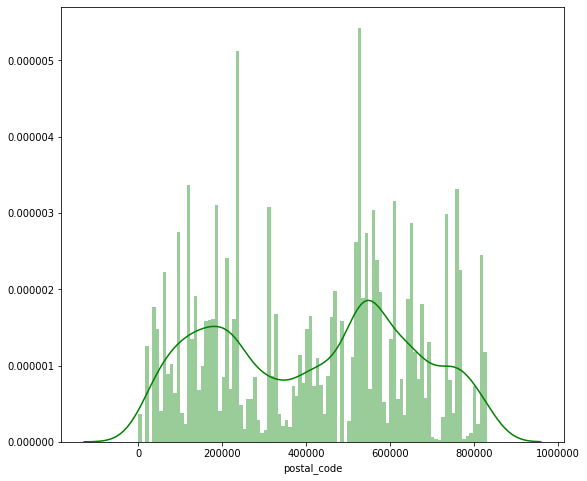

In [7]:
print(poi["postal_code"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(poi["postal_code"], color='g', bins=100, hist_kws={'alpha': 0.4});

In [8]:
list(set(poi.dtypes.tolist()))


[dtype('int64'), dtype('O'), dtype('float64')]

In [9]:
poi_num = poi.select_dtypes(include = ['float64', 'int64'])
poi_num.head()

,lat,long,postal_code
0,1.303656,103.748093,609831
1,1.350476,103.861603,556771
2,1.328144,103.868454,534561
3,1.318662,103.914444,458200
4,1.349045,103.928528,529594


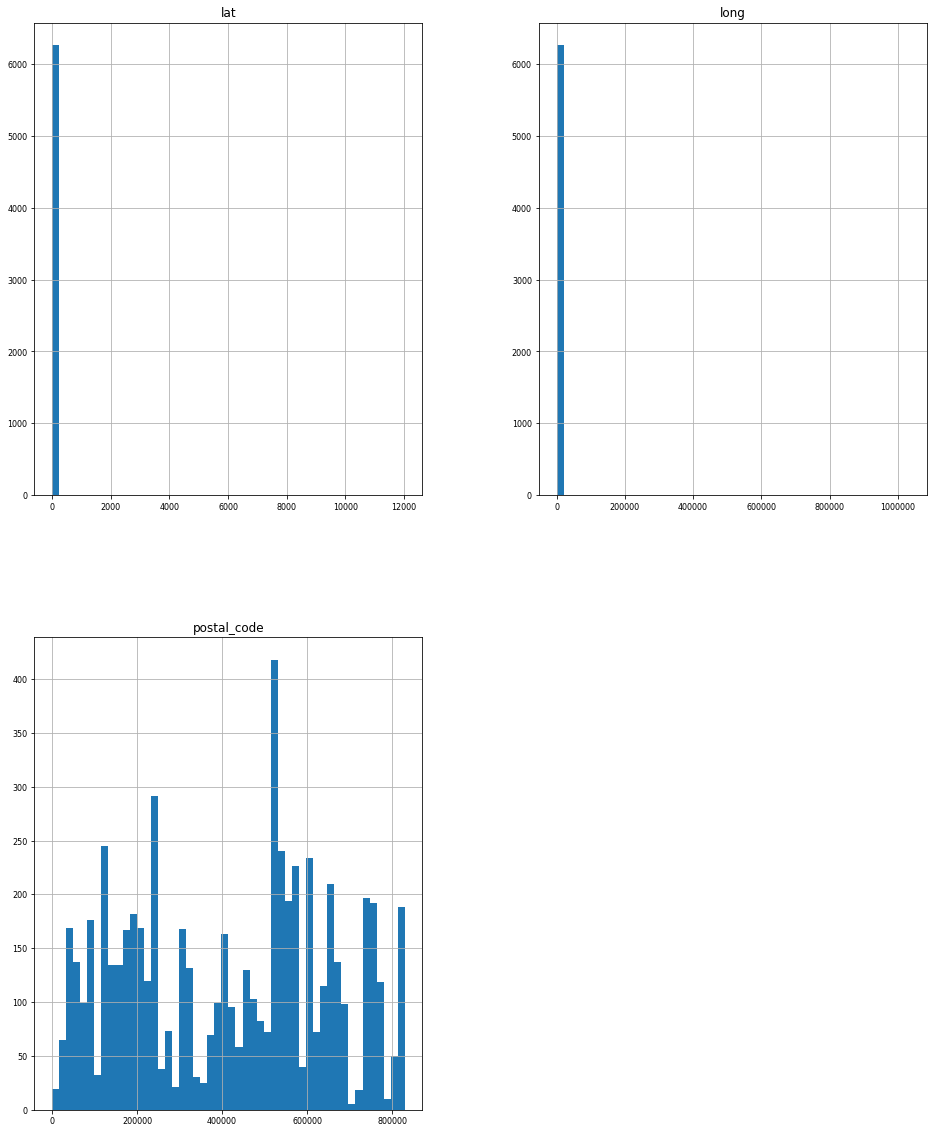

In [10]:
poi_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [11]:
poi_num_corr = poi_num.corr()['postal_code'][:-1] 
imp_features_list = poi_num_corr[abs(poi_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with postal_code:\n{}".format(len(imp_features_list), imp_features_list))

There is 0 strongly correlated values with postal_code:
Series([], Name: postal_code, dtype: float64)


In [ ]:
# for i in range(0, len(poi_num.columns),3):
sns.pairplot(data=poi_num,
                x_vars=poi_num,
                y_vars=['postal_Code'])

In [26]:
data

,ro_place_id,location_name,ro_brand_ids,brands,top_category,sub_category,lat,long,street_address,city,region,postal_code,iso_country_code,open_hours,category_tags,poi_source,timestamp,ds_name
0,ro:b0fc631c-8e32-49f7-9147-56c80803301a,Caltex Jalan Buroh,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.303656,103.748093,210 Jalan Buroh,0,Southwest,609831,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
1,ro:4d56441d-5f01-4580-b2c7-8d7d3f1f8669,Caltex Lorong Chuan,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.350476,103.861603,277 Lorong Chuan Road,0,Southeast,556771,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
2,ro:e61e103d-5a80-4ae1-9607-63bf08f4bc2e,Caltex Serangoon Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.328144,103.868454,559 Upper Serangoon Road,0,Southeast,534561,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
3,ro:0fbeb730-418f-4da2-8906-be680ed12418,Caltex Frankel Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.318662,103.914444,71 Frankel Avenue,0,Southeast,458200,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
4,ro:4e02b510-e895-4615-b3a5-c90e15794baa,Caltex Tampines,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.349045,103.928528,1 Tampines Avenue 8,0,Northeast,529594,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,ro:2d2deaa5-fc5f-4628-a5a5-d3e6dc6885c7,Caltex Changi,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.316168,103.897591,78 Changi Road,0,Southeast,419714,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6256,ro:63d45579-384e-4b56-ba17-18279bc63da4,Caltex Tanjong Katong,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.305560,103.896065,265 Tanjong Katong Road,0,Southeast,437052,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6257,ro:ef5164a0-8906-42b2-9d36-4442befe3999,Caltex Macpherson 465,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.331925,103.881386,465 Macpherson Road,0,Southeast,368183,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6258,ro:059618c6-e5a5-44ef-b8d7-b517779dde33,Caltex Macpherson 68,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1.332563,103.884865,68 Macpherson Road,0,Southeast,348473,sg,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station


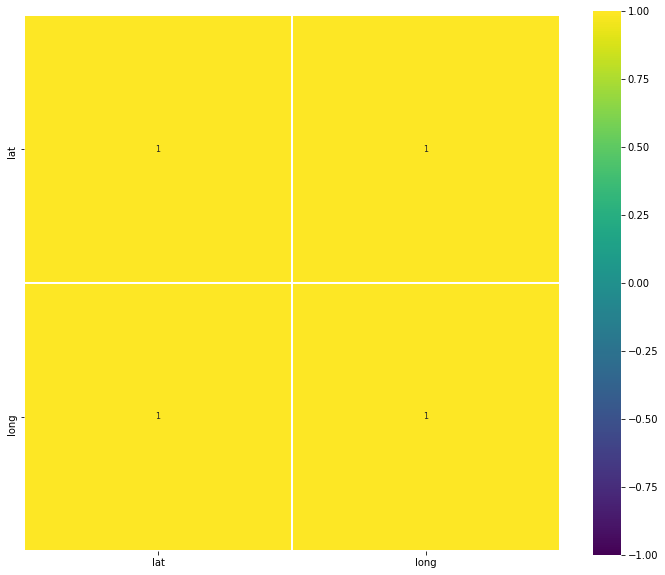

In [14]:
corr = poi_num.drop('postal_code', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [18]:
poi_num.columns

Index(['lat', 'long', 'postal_code'], dtype='object')

In [19]:
features_to_analyse=poi_num.columns

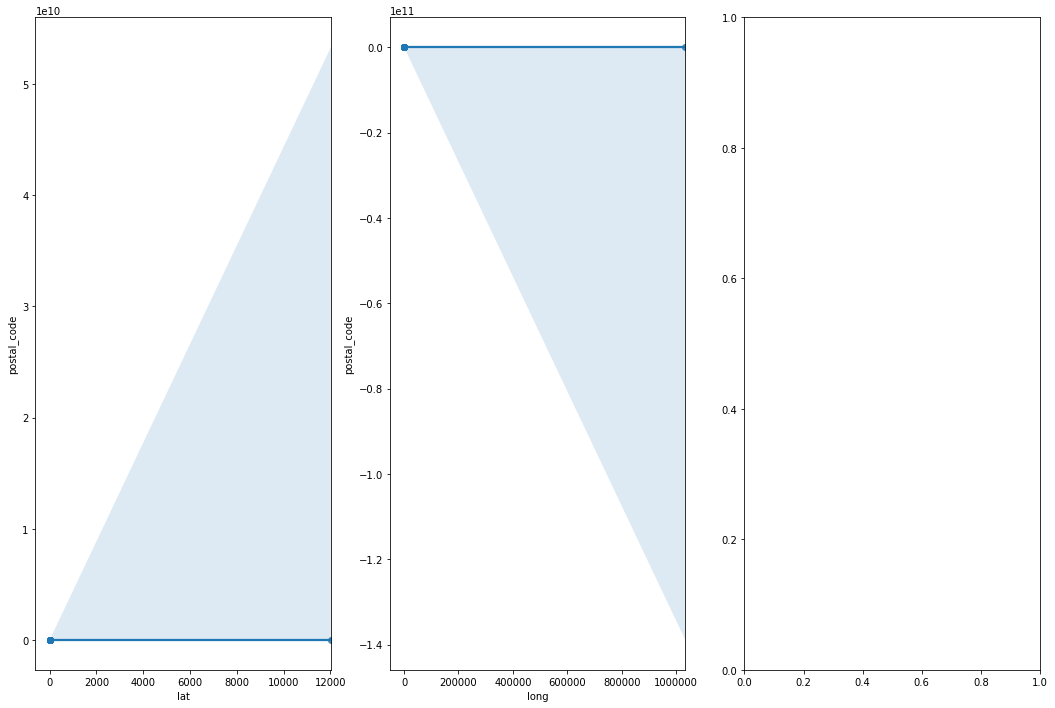

In [21]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='postal_code', data=poi[features_to_analyse], ax=ax)

In [26]:
poi.columns

Index(['ro_place_id', 'location_name', 'ro_brand_ids', 'brands',
       'top_category', 'sub_category', 'lat', 'long', 'street_address', 'city',
       'region', 'postal_code', 'iso_country_code', 'phone_number',
       'open_hours', 'category_tags', 'poi_source', 'timestamp', 'ds_name'],
      dtype='object')

In [33]:
categorical_features =['location_name', 'ro_brand_ids', 'brands',
       'top_category', 'sub_category', 'street_address', 'city',
       'region', 'postal_code', 'iso_country_code', 'phone_number',
       'open_hours', 'category_tags', 'poi_source', 'timestamp', 'ds_name']
poi_categ = poi[categorical_features]
poi_categ.head()

,location_name,ro_brand_ids,brands,top_category,sub_category,street_address,city,region,postal_code,iso_country_code,phone_number,open_hours,category_tags,poi_source,timestamp,ds_name
0,Caltex Jalan Buroh,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,210 Jalan Buroh,Singapore,Southwest,609831,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
1,Caltex Lorong Chuan,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,277 Lorong Chuan Road,Singapore,Southeast,556771,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
2,Caltex Serangoon Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,559 Upper Serangoon Road,Singapore,Southeast,534561,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
3,Caltex Frankel Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,71 Frankel Avenue,Singapore,Southeast,458200,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
4,Caltex Tampines,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1 Tampines Avenue 8,Singapore,Northeast,529594,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station


In [34]:
poi_not_num = poi_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(poi_not_num.columns), poi_not_num.columns.tolist()))

There is 15 non numerical features including:
['location_name', 'ro_brand_ids', 'brands', 'top_category', 'sub_category', 'street_address', 'city', 'region', 'iso_country_code', 'phone_number', 'open_hours', 'category_tags', 'poi_source', 'timestamp', 'ds_name']


In [35]:
poi_categ

,location_name,ro_brand_ids,brands,top_category,sub_category,street_address,city,region,postal_code,iso_country_code,phone_number,open_hours,category_tags,poi_source,timestamp,ds_name
0,Caltex Jalan Buroh,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,210 Jalan Buroh,Singapore,Southwest,609831,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
1,Caltex Lorong Chuan,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,277 Lorong Chuan Road,Singapore,Southeast,556771,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
2,Caltex Serangoon Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,559 Upper Serangoon Road,Singapore,Southeast,534561,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
3,Caltex Frankel Avenue,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,71 Frankel Avenue,Singapore,Southeast,458200,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
4,Caltex Tampines,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,1 Tampines Avenue 8,Singapore,Northeast,529594,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,Caltex Changi,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,78 Changi Road,Singapore,Southeast,419714,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6256,Caltex Tanjong Katong,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,265 Tanjong Katong Road,Singapore,Southeast,437052,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6257,Caltex Macpherson 465,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,465 Macpherson Road,Singapore,Southeast,368183,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station
6258,Caltex Macpherson 68,{RO_BRAND_9},"{""Caltex Oil""}",Gasoline Stations,Gasoline Stations with Convenience Stores,68 Macpherson Road,Singapore,Southeast,348473,sg,NaN,"{'Mon':[['24Hrs','24Hrs']],Tue':[['24Hrs','24H...","{""fuel pumps""}",Sg Petrol Stations,7_2020,fuel_station


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

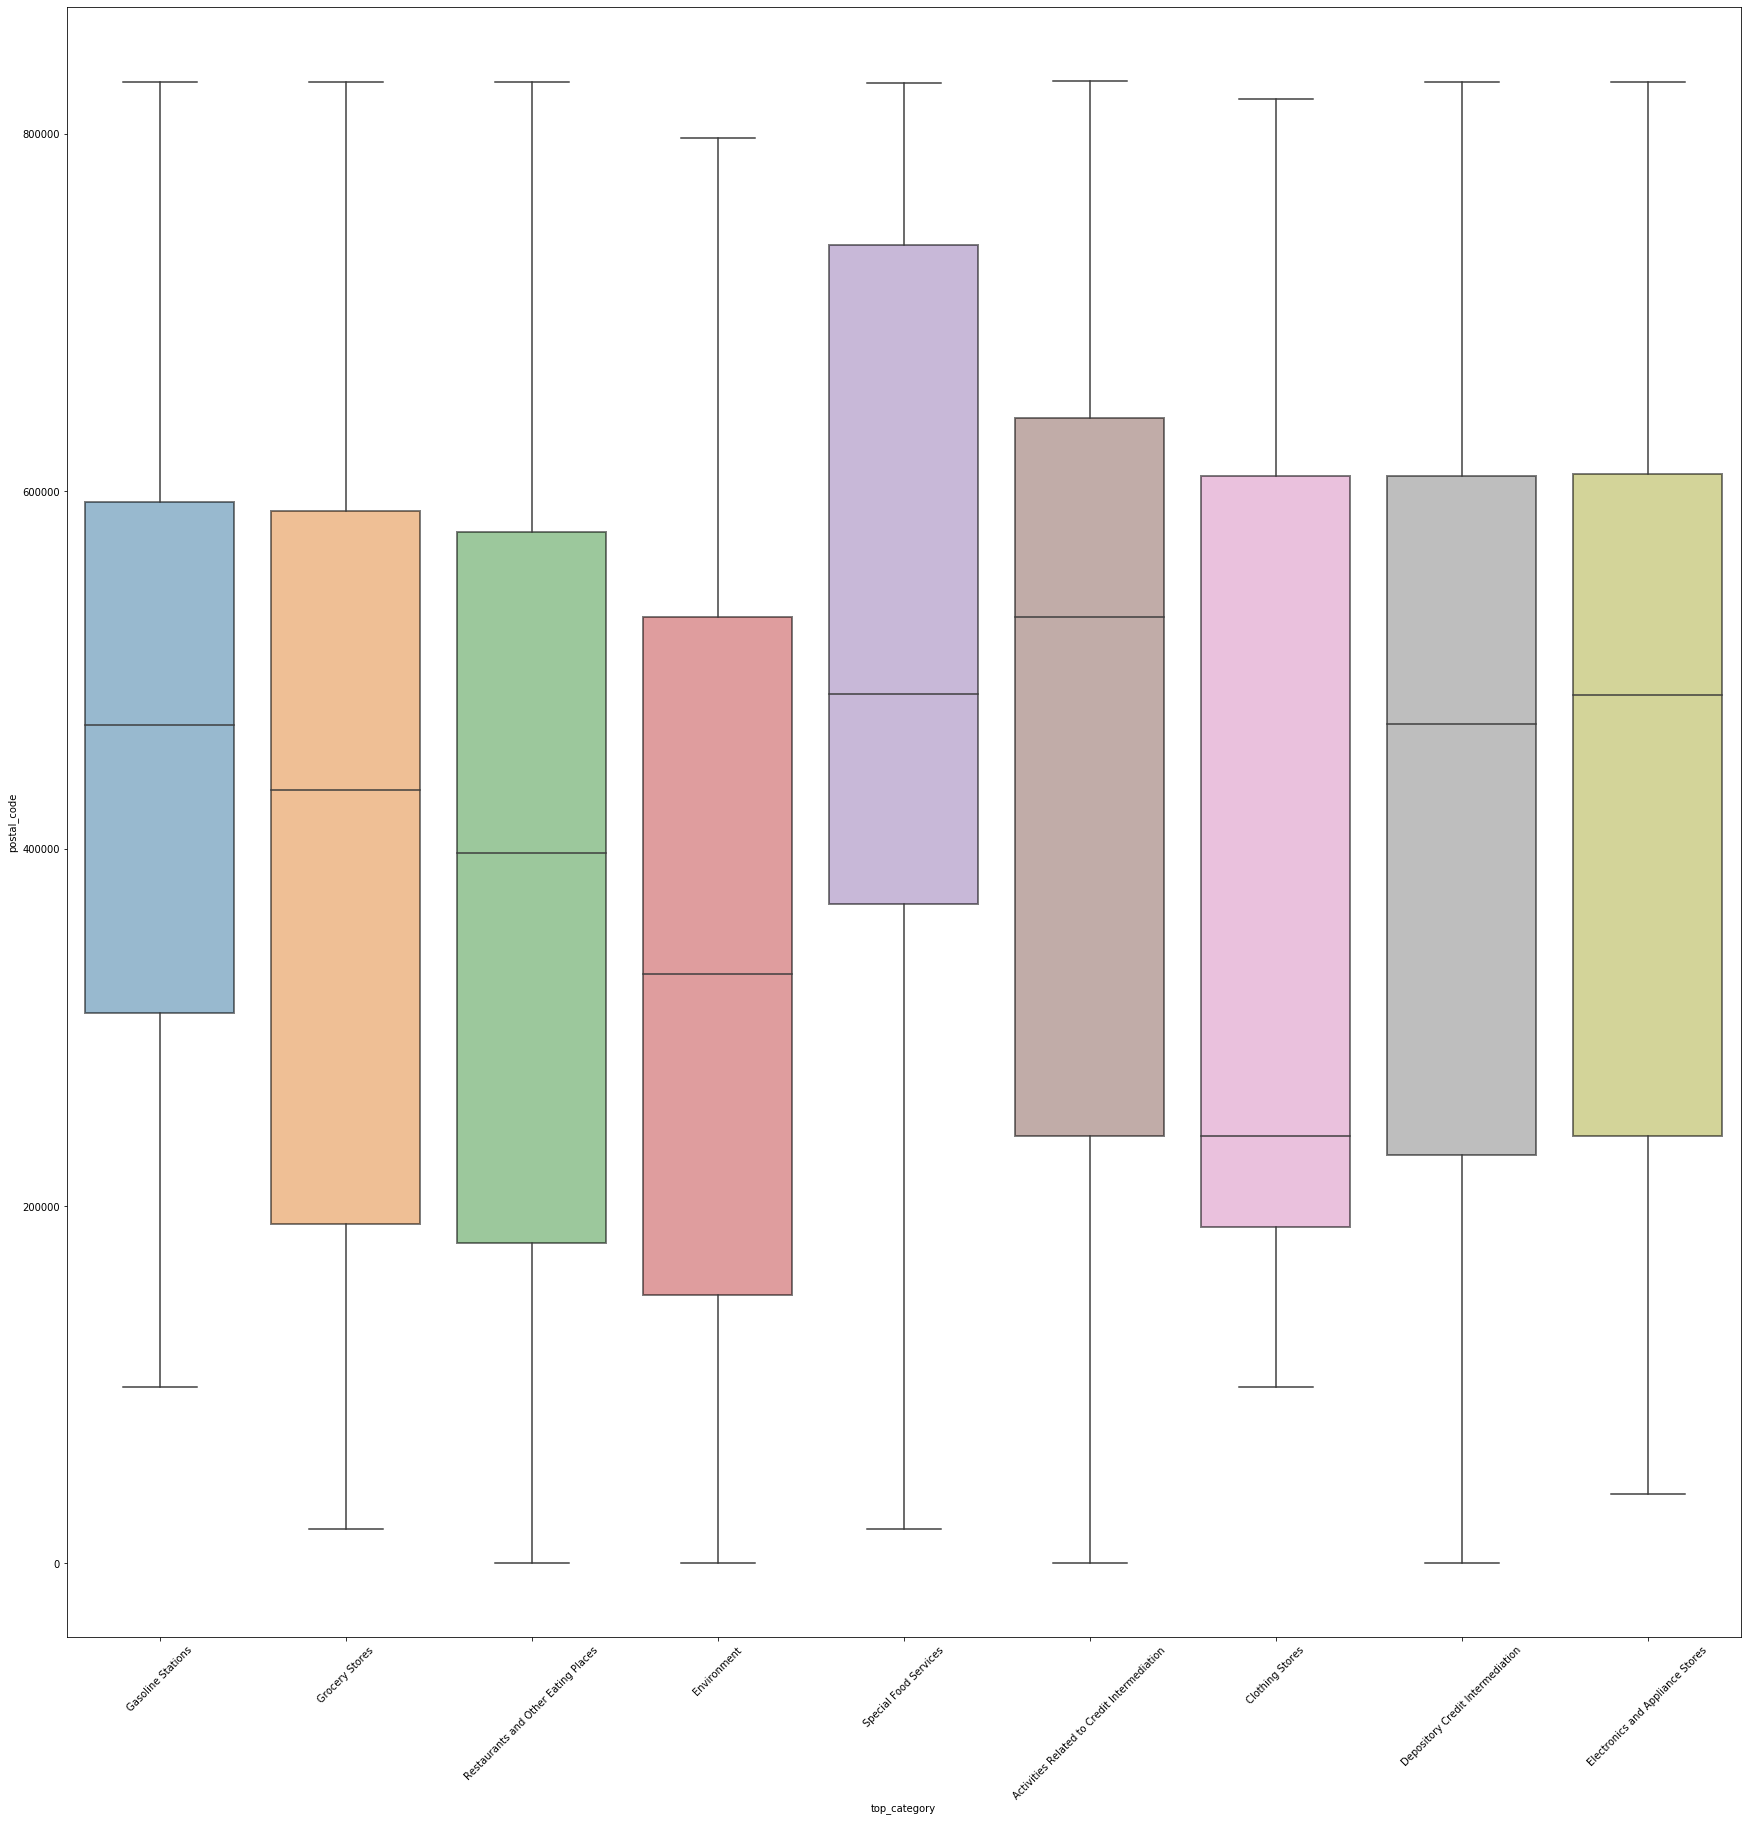

In [43]:
plt.figure(figsize = (30,30))
ax = sns.boxplot(x='top_category', y='postal_code', data=poi_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [45]:
fig, axes = plt.subplots(round(len(poi_not_num.columns) / 3), 3, figsize=(100,100))

for i, ax in enumerate(fig.axes):
    if i < len(poi_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=poi_not_num.columns[i], alpha=0.7, data=poi_not_num, ax=ax)
fig.canvas.draw()
fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)
